# Tarea 7.10

Use una función interpolante para encontrar una buena aproximación a una gaussiana con $\sigma = 1$ y $\mu = 0$ entre $x = 0$ y $x = 2$. ¿Se puede usar ese mismo polinomio para aproximar la gaussiana en $x = 3$? De una respuesta cuantitativa y argumente.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Distribución Gaussiana
def gauss(x, mu, sigma):
    return (1/(np.sqrt(2*np.pi)*sigma))*np.exp(-(x-mu)**2/(2*sigma**2))

In [4]:
#Se definen lo parámetros usados para encontrar la función de interpolación
h = np.sqrt(8*10**(-6)/np.exp(1))
num = int(1/h + 2)
true_h = 1/(num - 1)

#se define la función que usaremos en este caso de interpolación
def interpolacion(x, points):
    
    i = int(x/true_h)
    x0 = points[i][0]
    x1 = points[i + 1][0]
    Lo = (x - x1)/(x0 - x1)
    L1 = (x - x0)/(x1 - x0)

    return points[i][1]*Lo + points[i+1][1]*L1

In [5]:
#definimos los parámetros para definir los puntos que se considerarán para graficar
x = np.linspace(0, 2, num)
g = gauss(x, 0, 1)
puntos = [(x[i], g[i]) for i in range(num)]

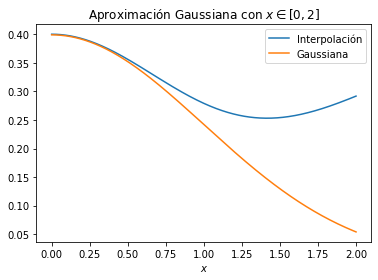

In [13]:
#Aproximación con interpolación x = {0, 2}
y = np.linspace(0, 0.9999, num)
plt.plot(x, 0.4+g-[interpolacion(yi, puntos) for yi in y], label='Interpolación')
plt.plot(x, gauss(x, 0, 1), label='Gaussiana')
plt.title('Aproximación Gaussiana con $x \in [0, 2]$')
plt.xlabel('$x$')
plt.legend()
plt.show()

In [39]:
#cambiamos los parametros para interpolar 

x = np.linspace(0, 2, num)
g = gauss(x, 0.2, 1)
puntos = [(x[i], g[i]) for i in range(num)]

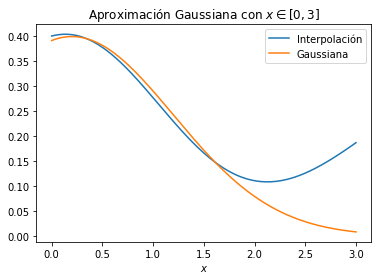

In [40]:
#Aproximación con interpolación x = {0, 3}
z = np.linspace(0, 3, num)
plt.plot(z, 0.4+gauss(z, 0.2, 1)-[interpolacion(yi, puntos) for yi in y], label='Interpolación')
plt.plot(z, gauss(z, 0.2, 1), label='Gaussiana')
plt.title('Aproximación Gaussiana con $x \in [0, 3]$')
plt.xlabel('$x$')
plt.legend()
plt.show()

Finalmente podemos decir que el polinomio no encaja perfectamente con la Gaussiana en el intervalo x = 0 y 
x = 2 a pesar de que se acercan mucho e incluso se cruzan, luego de x = 1,6 aprox se comienzan a separar, creo que falto ajustar más la curva, pero de igual forma podemos ver que en el intervalo x = 3 ya se separan mucho más y no coinciden. Además podemos destacar que la interpolación se ajusta muy bien en los primeros puntos de la Gaussiana, pero por errores de redondeo o de otro tipo finalmente no queda tan bien como se esperaba. 